# <center><b><h1>NeuralNetwork (First Run)</h1></b></center> ho incasinato l'output

In [1]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn import datasets
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score, r2_score, recall_score, auc, roc_auc_score, roc_curve
import pandas as pd
from sklearn.externals import joblib
from scipy.stats import spearmanr, pearsonr
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score, precision_score
import itertools

from sklearn.neural_network import MLPClassifier

## 1. Prepare the data

In [2]:
df_X_train = pd.read_csv("../Data/X_train.csv", index_col=0)
df_X_train.shape

(516, 16)

In [3]:
df_y_train = pd.read_csv("../Data/y_train.csv", index_col=0)
df_y_train.shape

(516, 1)

In [4]:
df_X_val = pd.read_csv("../Data/X_val.csv", index_col=0)
df_X_val.shape

(30777, 16)

In [5]:
df_y_val = pd.read_csv("../Data/y_val.csv", index_col=0)
df_y_val.shape

(30777, 1)

## 2. Finding the best number of layers (between 1 and 2) and the best number of neurons

### 2.1 AUC based

In [6]:
best_score_sl = actual_score = 0
best_i_sl = 0
for i in range(1,32,1):
    mlp = MLPClassifier(hidden_layer_sizes=(i,), max_iter=200000,verbose=False)
    mlp.fit(df_X_train,df_y_train['Class'].values)
    predictions = mlp.predict(df_X_val.values)
    fpr, tpr, thresholds = roc_curve(df_y_val['Class'].values, predictions, pos_label=1)
    actual_score = auc(fpr, tpr)
    if actual_score > best_score_sl:
        best_score_sl = actual_score
        best_i_sl = i
    print("I: ", i, "Best_I: ",best_i_sl,"Best_Score: ", best_score_sl,"Actual_Score: ", actual_score)
print("Best_I: ",best_i_sl,"Best_Score: ", best_score_sl)

I:  1 Best_I:  1 Best_Score:  0.5393859634039396 Actual_Score:  0.5393859634039396
I:  2 Best_I:  2 Best_Score:  0.5418009521165925 Actual_Score:  0.5418009521165925
I:  3 Best_I:  2 Best_Score:  0.5418009521165925 Actual_Score:  0.5146772359141523
I:  4 Best_I:  4 Best_Score:  0.5522617067844449 Actual_Score:  0.5522617067844449
I:  5 Best_I:  5 Best_Score:  0.5693849439808594 Actual_Score:  0.5693849439808594
I:  6 Best_I:  5 Best_Score:  0.5693849439808594 Actual_Score:  0.5611227041486835
I:  7 Best_I:  5 Best_Score:  0.5693849439808594 Actual_Score:  0.5505056584122056
I:  8 Best_I:  8 Best_Score:  0.5718487544615112 Actual_Score:  0.5718487544615112
I:  9 Best_I:  8 Best_Score:  0.5718487544615112 Actual_Score:  0.5500727106582525
I:  10 Best_I:  10 Best_Score:  0.5968144871073686 Actual_Score:  0.5968144871073686
I:  11 Best_I:  10 Best_Score:  0.5968144871073686 Actual_Score:  0.5965052825767085
I:  12 Best_I:  10 Best_Score:  0.5968144871073686 Actual_Score:  0.501705077218227

In [7]:
best_score_twol = actual_score = 0
best_i_twol = best_j_twol = 0
for i in range(1,32,1):
    for j in range(1,32,1):
        mlp = MLPClassifier(hidden_layer_sizes=(i,j,), max_iter=200000,verbose=False)
        mlp.fit(df_X_train,df_y_train['Class'].values)
        predictions = mlp.predict(df_X_val.values)
        fpr, tpr, thresholds = roc_curve(df_y_val['Class'].values, predictions, pos_label=1)
        actual_score = auc(fpr, tpr)
        if actual_score > best_score_twol:
            best_score_twol = actual_score
            best_i_twol = i
            best_j_twol = j
        print("I,J: ", i,"-",j)
    print("Best_I: ", best_i_twol,"Best_J: ", best_j_twol,"Best_Score: ", best_score_twol,"Actual_Score: ", actual_score)
print("Best_I: ",best_i_twol,"Best_I: ",best_j_twol,"Best_Score: ", best_score_twol)

I,J:  1 - 1
I,J:  1 - 2
I,J:  1 - 3
I,J:  1 - 4
I,J:  1 - 5
I,J:  1 - 6
I,J:  1 - 7
I,J:  1 - 8
I,J:  1 - 9
I,J:  1 - 10
I,J:  1 - 11
I,J:  1 - 12
I,J:  1 - 13
I,J:  1 - 14
I,J:  1 - 15
I,J:  1 - 16
I,J:  1 - 17
I,J:  1 - 18
I,J:  1 - 19
I,J:  1 - 20
I,J:  1 - 21
I,J:  1 - 22
I,J:  1 - 23
I,J:  1 - 24
I,J:  1 - 25
I,J:  1 - 26
I,J:  1 - 27
I,J:  1 - 28
I,J:  1 - 29
I,J:  1 - 30
I,J:  1 - 31
Best_I:  1 Best_J:  8 Best_Score:  0.5499818223354369 Actual_Score:  0.539673981129619
I,J:  2 - 1
I,J:  2 - 2
I,J:  2 - 3
I,J:  2 - 4
I,J:  2 - 5
I,J:  2 - 6
I,J:  2 - 7
I,J:  2 - 8
I,J:  2 - 9
I,J:  2 - 10
I,J:  2 - 11
I,J:  2 - 12
I,J:  2 - 13
I,J:  2 - 14
I,J:  2 - 15
I,J:  2 - 16
I,J:  2 - 17
I,J:  2 - 18
I,J:  2 - 19
I,J:  2 - 20
I,J:  2 - 21
I,J:  2 - 22
I,J:  2 - 23
I,J:  2 - 24
I,J:  2 - 25
I,J:  2 - 26
I,J:  2 - 27
I,J:  2 - 28
I,J:  2 - 29
I,J:  2 - 30
I,J:  2 - 31
Best_I:  2 Best_J:  3 Best_Score:  0.5715463051440334 Actual_Score:  0.5520615068301346
I,J:  3 - 1
I,J:  3 - 2
I,J:  3 - 3
I

I,J:  17 - 20
I,J:  17 - 21
I,J:  17 - 22
I,J:  17 - 23
I,J:  17 - 24
I,J:  17 - 25
I,J:  17 - 26
I,J:  17 - 27
I,J:  17 - 28
I,J:  17 - 29
I,J:  17 - 30
I,J:  17 - 31
Best_I:  14 Best_J:  31 Best_Score:  0.6366349335409844 Actual_Score:  0.5797170425431044
I,J:  18 - 1
I,J:  18 - 2
I,J:  18 - 3
I,J:  18 - 4
I,J:  18 - 5
I,J:  18 - 6
I,J:  18 - 7
I,J:  18 - 8
I,J:  18 - 9
I,J:  18 - 10
I,J:  18 - 11
I,J:  18 - 12
I,J:  18 - 13
I,J:  18 - 14
I,J:  18 - 15
I,J:  18 - 16
I,J:  18 - 17
I,J:  18 - 18
I,J:  18 - 19
I,J:  18 - 20
I,J:  18 - 21
I,J:  18 - 22
I,J:  18 - 23
I,J:  18 - 24
I,J:  18 - 25
I,J:  18 - 26
I,J:  18 - 27
I,J:  18 - 28
I,J:  18 - 29
I,J:  18 - 30
I,J:  18 - 31
Best_I:  14 Best_J:  31 Best_Score:  0.6366349335409844 Actual_Score:  0.5574527810598562
I,J:  19 - 1
I,J:  19 - 2
I,J:  19 - 3
I,J:  19 - 4
I,J:  19 - 5
I,J:  19 - 6
I,J:  19 - 7
I,J:  19 - 8
I,J:  19 - 9
I,J:  19 - 10
I,J:  19 - 11
I,J:  19 - 12
I,J:  19 - 13
I,J:  19 - 14
I,J:  19 - 15
I,J:  19 - 16
I,J:  19 - 1

## 3 Find the best random state for both single layer and two layers

In [8]:
best_score_sl = actual_score = 0
best_random_state_sl = 0
for i in range(1,100,1):
    mlp = MLPClassifier(hidden_layer_sizes=(best_i_sl,), max_iter=200000,verbose=False, random_state=i)
    mlp.fit(df_X_train,df_y_train['Class'].values)
    predictions = mlp.predict(df_X_val.values)
    fpr, tpr, thresholds = roc_curve(df_y_val['Class'].values, predictions, pos_label=1)
    actual_score = auc(fpr, tpr)
    if actual_score > best_score_sl:
        best_score_sl = actual_score
        best_random_state_sl = i
    print("I: ", i, "Best_Random_State: ",best_random_state_sl,"Best_Score: ", best_score_sl,"Actual_Score: ", actual_score)
print("Best_Random_State: ",best_random_state_sl,"Best_Score: ", best_score_sl)

I:  1 Best_Random_State:  1 Best_Score:  0.5563510672008608 Actual_Score:  0.5563510672008608
I:  2 Best_Random_State:  1 Best_Score:  0.5563510672008608 Actual_Score:  0.5298343990193887
I:  3 Best_Random_State:  1 Best_Score:  0.5563510672008608 Actual_Score:  0.5412749666538113
I:  4 Best_Random_State:  4 Best_Score:  0.5868824813985992 Actual_Score:  0.5868824813985992
I:  5 Best_Random_State:  5 Best_Score:  0.5944937643241226 Actual_Score:  0.5944937643241226
I:  6 Best_Random_State:  5 Best_Score:  0.5944937643241226 Actual_Score:  0.5936588813858259
I:  7 Best_Random_State:  5 Best_Score:  0.5944937643241226 Actual_Score:  0.5692188271476052
I:  8 Best_Random_State:  5 Best_Score:  0.5944937643241226 Actual_Score:  0.5772532320624526
I:  9 Best_Random_State:  9 Best_Score:  0.5972065965270834 Actual_Score:  0.5972065965270834
I:  10 Best_Random_State:  10 Best_Score:  0.5989641801750459 Actual_Score:  0.5989641801750459
I:  11 Best_Random_State:  11 Best_Score:  0.6049855315615

I:  87 Best_Random_State:  76 Best_Score:  0.6251992787888763 Actual_Score:  0.5384270301872054
I:  88 Best_Random_State:  76 Best_Score:  0.6251992787888763 Actual_Score:  0.5130869973200226
I:  89 Best_Random_State:  76 Best_Score:  0.6251992787888763 Actual_Score:  0.5769277536091262
I:  90 Best_Random_State:  76 Best_Score:  0.6251992787888763 Actual_Score:  0.5777251758197759
I:  91 Best_Random_State:  76 Best_Score:  0.6251992787888763 Actual_Score:  0.5537196046112314
I:  92 Best_Random_State:  76 Best_Score:  0.6251992787888763 Actual_Score:  0.5562420626245108
I:  93 Best_Random_State:  76 Best_Score:  0.6251992787888763 Actual_Score:  0.5728755468652127
I:  94 Best_Random_State:  76 Best_Score:  0.6251992787888763 Actual_Score:  0.5894813961428962
I:  95 Best_Random_State:  76 Best_Score:  0.6251992787888763 Actual_Score:  0.6128083754817695
I:  96 Best_Random_State:  76 Best_Score:  0.6251992787888763 Actual_Score:  0.5610493179691127
I:  97 Best_Random_State:  76 Best_Score

In [9]:
best_score_twol = actual_score = 0
best_random_state_twol = 0
for i in range(1,100,1):
    mlp = MLPClassifier(hidden_layer_sizes=(best_i_twol,best_j_twol), max_iter=200000,verbose=False, random_state=i)
    mlp.fit(df_X_train,df_y_train['Class'].values)
    predictions = mlp.predict(df_X_val.values)
    fpr, tpr, thresholds = roc_curve(df_y_val['Class'].values, predictions, pos_label=1)
    actual_score = auc(fpr, tpr)
    if actual_score > best_score_twol:
        best_score_twol = actual_score
        best_random_state_twol = i
    print("I: ", i, "Best_Random_State: ",best_random_state_twol,"Best_Score: ", best_score_twol,"Actual_Score: ", actual_score)
print("Best_Random_State: ",best_random_state_twol,"Best_Score: ", best_score_twol)

I:  1 Best_Random_State:  1 Best_Score:  0.5601005175721518 Actual_Score:  0.5601005175721518
I:  2 Best_Random_State:  2 Best_Score:  0.5737770607698979 Actual_Score:  0.5737770607698979
I:  3 Best_Random_State:  2 Best_Score:  0.5737770607698979 Actual_Score:  0.5715036244789273
I:  4 Best_Random_State:  2 Best_Score:  0.5737770607698979 Actual_Score:  0.5334585708916636
I:  5 Best_Random_State:  2 Best_Score:  0.5737770607698979 Actual_Score:  0.5483556582893835
I:  6 Best_Random_State:  2 Best_Score:  0.5737770607698979 Actual_Score:  0.5700340585566444
I:  7 Best_Random_State:  2 Best_Score:  0.5737770607698979 Actual_Score:  0.5194077274725922
I:  8 Best_Random_State:  8 Best_Score:  0.5756111011488775 Actual_Score:  0.5756111011488775
I:  9 Best_Random_State:  8 Best_Score:  0.5756111011488775 Actual_Score:  0.4961621177470505
I:  10 Best_Random_State:  8 Best_Score:  0.5756111011488775 Actual_Score:  0.5528847216729348
I:  11 Best_Random_State:  8 Best_Score:  0.575611101148877

I:  87 Best_Random_State:  40 Best_Score:  0.6036510699029459 Actual_Score:  0.5372178470275834
I:  88 Best_Random_State:  88 Best_Score:  0.6108066829938121 Actual_Score:  0.6108066829938121
I:  89 Best_Random_State:  88 Best_Score:  0.6108066829938121 Actual_Score:  0.6043947574632824
I:  90 Best_Random_State:  88 Best_Score:  0.6108066829938121 Actual_Score:  0.5376360561345934
I:  91 Best_Random_State:  88 Best_Score:  0.6108066829938121 Actual_Score:  0.567440056694662
I:  92 Best_Random_State:  88 Best_Score:  0.6108066829938121 Actual_Score:  0.5411334142321288
I:  93 Best_Random_State:  88 Best_Score:  0.6108066829938121 Actual_Score:  0.5316408044353501
I:  94 Best_Random_State:  88 Best_Score:  0.6108066829938121 Actual_Score:  0.5404563576381809
I:  95 Best_Random_State:  88 Best_Score:  0.6108066829938121 Actual_Score:  0.5320802003473407
I:  96 Best_Random_State:  88 Best_Score:  0.6108066829938121 Actual_Score:  0.5633878499507484
I:  97 Best_Random_State:  88 Best_Score:

## 4. Compute metrics on the best architecture

In [10]:
if best_score_sl > best_score_twol:
    best_architecture = "One Layers"
    best_neurons = [best_i_sl]
    mlp = MLPClassifier(hidden_layer_sizes=(best_i_sl,), max_iter=200000,verbose=False, random_state=best_random_state_sl)
    mlp.fit(df_X_train,df_y_train['Class'].values)
else:
    best_architecture = "Two Layers"
    best_neurons = [best_i_twol, best_j_twol]
    mlp = MLPClassifier(hidden_layer_sizes=(best_i_twol,best_j_twol), max_iter=200000,verbose=False, random_state=best_random_state_twol)
    mlp.fit(df_X_train,df_y_train['Class'].values)

predictions = mlp.predict(df_X_val.values)
print("The best architecture is : ", best_architecture)
layer = 0
for neuron in best_neurons:
    layer += 1
    print("For the layer ", layer, " the best number of neurons is : ", neuron)

The best architecture is :  One Layers
For the layer  1  the best number of neurons is :  21


### 4.3 Confusion Matrix

In [11]:
conf_mat = confusion_matrix(df_y_val['Class'].values,predictions)
tn, fp, fn, tp = conf_mat.ravel()
print(conf_mat)

[[21606  9118]
 [   24    29]]


In [12]:
print(classification_report(df_y_val['Class'].values,predictions,target_names=['Non-Fracture','Fracture']))

              precision    recall  f1-score   support

Non-Fracture       1.00      0.70      0.83     30724
    Fracture       0.00      0.55      0.01        53

   micro avg       0.70      0.70      0.70     30777
   macro avg       0.50      0.63      0.42     30777
weighted avg       1.00      0.70      0.82     30777



### 4.2 Accuracy

In [13]:
accuracy = (tp + tn) / float(tp+tn+fp+fn)
print("Accuracy : ",accuracy)

Accuracy :  0.7029600025993437


### 4.3 Recall (or Sensitivity)

In [14]:
recall = tp/(tp+fn)
print("Recall : ", recall)

Recall :  0.5471698113207547


### 4.4 Error

In [15]:
classification_error = (fp + fn) / float(tp+tn+fp+fn)
print("Error : ",classification_error)

Error :  0.29703999740065634


### 4.5 Specificity

In [16]:
specificity = tn / (tn+fp)

print(specificity)

0.7032287462569978


### 4.6 False Positive Rate: When the actual value is negative, how often is the prediction incorrect?

In [17]:
false_positive_rate = fp / float(tn+fp)

print(false_positive_rate)
print(1 - specificity)

0.29677125374300223
0.2967712537430022


### 4.7 Precision: When a positive value is predicted, how often is the prediction correct?

In [18]:
precision = tp / float(tp+fp)

print(precision)

0.0031704383951022194


## 5. Metrics visualization

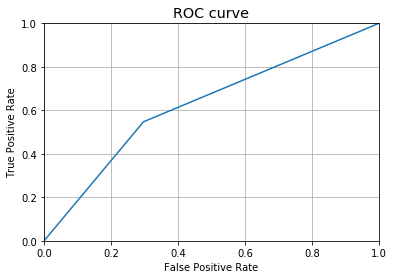

In [19]:
fpr, tpr, thresholds = roc_curve(df_y_val, predictions)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)

## 6. Creation new dataframe

In [20]:
mod_df = pd.DataFrame(df_X_val)

In [21]:
mod_df.head()

,sex,age,weight,height,HIPX,menopause,HRT,smoking,ReumatoidArthritis,SecondaryOsteoporsis,Alcohol,VitaminD,calcium,dose_walk,dose_moderate,dose_vigorous
149978,-1.029482,0.152632,-1.383228,-1.438686,-0.037838,1.436838,-0.423252,-0.808640,-0.08895,-0.134216,-0.612333,-0.141958,0.115530,-0.259297,-0.462525,-0.538945
43265,0.971362,-1.957990,0.637841,1.770734,-0.037838,-0.695973,-0.423252,0.760768,-0.08895,-0.134216,0.104979,1.276093,0.113305,-0.637774,-0.611945,0.201583
116861,0.971362,1.145866,2.161613,1.498749,-0.037838,-0.695973,-0.423252,0.760768,-0.08895,-0.134216,0.104979,-0.504631,-0.366965,-0.493062,0.583416,-0.353813
46479,0.971362,-0.716448,-0.803047,0.845986,-0.037838,-0.695973,-0.423252,2.330176,-0.08895,-0.134216,3.056626,-1.030506,-0.598176,-0.504194,-0.462525,-0.168681
115581,-1.029482,-0.095676,0.274431,0.737192,-0.037838,1.436838,-0.423252,-0.808640,-0.08895,-0.134216,0.397031,-0.874557,-0.343833,-0.593247,-0.562138,-0.508090


In [22]:
mod_df['real_class'] = df_y_val
mod_df['predicted_class'] = predictions

In [23]:
mod_df.head()

,sex,age,weight,height,HIPX,menopause,HRT,smoking,ReumatoidArthritis,SecondaryOsteoporsis,Alcohol,VitaminD,calcium,dose_walk,dose_moderate,dose_vigorous,real_class,predicted_class
149978,-1.029482,0.152632,-1.383228,-1.438686,-0.037838,1.436838,-0.423252,-0.808640,-0.08895,-0.134216,-0.612333,-0.141958,0.115530,-0.259297,-0.462525,-0.538945,0,1
43265,0.971362,-1.957990,0.637841,1.770734,-0.037838,-0.695973,-0.423252,0.760768,-0.08895,-0.134216,0.104979,1.276093,0.113305,-0.637774,-0.611945,0.201583,0,0
116861,0.971362,1.145866,2.161613,1.498749,-0.037838,-0.695973,-0.423252,0.760768,-0.08895,-0.134216,0.104979,-0.504631,-0.366965,-0.493062,0.583416,-0.353813,0,0
46479,0.971362,-0.716448,-0.803047,0.845986,-0.037838,-0.695973,-0.423252,2.330176,-0.08895,-0.134216,3.056626,-1.030506,-0.598176,-0.504194,-0.462525,-0.168681,0,1
115581,-1.029482,-0.095676,0.274431,0.737192,-0.037838,1.436838,-0.423252,-0.808640,-0.08895,-0.134216,0.397031,-0.874557,-0.343833,-0.593247,-0.562138,-0.508090,0,0


In [24]:
mod_df_complete = mod_df[(mod_df['real_class'] == 0) & ( mod_df['predicted_class']==1)]

In [25]:
mod_df_complete['Class'] = mod_df['real_class']
mod_df_complete = mod_df_complete.drop(['real_class','predicted_class'],axis=1)
mod_df_complete.shape

/Users/erennio/anaconda2/envs/Python36/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


(9118, 17)

In [26]:
std_patients = pd.read_csv('../Data/standardized_patients.csv', index_col=0)
std_patients.shape

(153884, 17)

for index in mod_df_complete.index.values:
    feature_to_check = std_patients.loc[index].round(10) == mod_df_complete.loc[index].round(10)
    for check in feature_to_check:
        if not check:
            print(index, feature_to_check)

In [27]:
for index in mod_df_complete.index.values:
    equals = True
    patient = std_patients.loc[index].round(10) == mod_df_complete.loc[index].round(10)
    for feature in patient:
        if not feature:
            equals = False
            print(std_patients.loc[index].round(10) == giorgiONE.loc[index].round(10), index)
    if equals:
        std_patients.loc[index,'Class'] = 1        
    

In [28]:
std_patients.loc[mod_df_complete.index.values,'Class'].shape

(9118,)

In [29]:
std_patients.to_csv('../Data/new_std_patients.csv')

## 7. Save the model

In [30]:
joblib.dump(mlp, 'NeuralNetwork - First Run.pkl') 

['NeuralNetwork - First Run.pkl']